<a href="https://colab.research.google.com/github/ObserveRTC/sample-reports/blob/main/Observer_BigQuery_Demo_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ObserveRTC Demo Reports

This notebook contains sample queries based on the default ObserveRTC Scheme v1.

Colab uses BigQuery magics for simple querying from a cell.

Modify these reports to suit your own needs

# Global Report Setup

Run this first to Authenticate!

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Styling fixes

In [ ]:
# Load this for filterable tables
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


Do this for darkmode only

In [ ]:
# If you use darkmode in colab do this to see Matlab's plots
# change to a different style as needed: https://matplotlib.org/3.1.1/gallery/index.html?highlight=style%20sheet#style-sheets
from matplotlib import style
style.use('dark_background') 

## Global report parameters

Setup some parameters for all the reports. All of the following queries rely on these variables, so run this first.

In [ ]:
# Specify specific project parameters
project = "observertc"
dataset = "demo_v1"

In [ ]:
# set the default dataset
from google.cloud.bigquery import magics
magics.context.default_query_job_config.default_dataset = project + "." + dataset

In [ ]:
# Specify date ranges
# ToDo: use forms for this
from datetime import date, timedelta

today = date.today()
yesterday = today - timedelta(days = 1)
last_seven = today - timedelta(days = 7)
last_thirty =  today - timedelta(days = 30)

In [ ]:
# Build the parameters
params = {
    'startDate': last_thirty.strftime("%Y-%m-%d"),
    'endDate': yesterday.strftime("%Y-%m-%d")
}

params

{'endDate': '2021-02-15', 'startDate': '2021-01-17'}

# Usage Analysis

###  Completed calls summaries by service & mediaUnit per day
This aggregate table is taken from the `FinishedCalls` and `DetachedPeerConnections` tables. Aggregating this data save some query costs.


In [ ]:
%%bigquery df --project $project --verbose --params $params
SELECT
  f.serviceName,
  mediaUnitID,
  COUNT( DISTINCT f.callUUID) AS calls,
  COUNT( DISTINCT d.browserID) as users, #if userID is populated use that instead
  COUNT( DISTINCT d.peerConnectionUUID) as pcs,
  COUNT( DISTINCT d.peerConnectionUUID) / COUNT( DISTINCT f.callUUID) as pcPerCall,
  EXTRACT(MONTH FROM f.timestamp ) AS Month,
  EXTRACT(DAY FROM f.timestamp) AS Day,
  CONCAT(
      LPAD( CAST(EXTRACT(MONTH FROM f.timestamp ) AS STRING), 2, '0'), 
      "-", 
      LPAD( CAST(EXTRACT(DAY FROM f.timestamp ) AS STRING), 2, '0')
    ) AS moDay
FROM `FinishedCalls` AS f
INNER JOIN `DetachedPeerConnections` AS d ON f.callUUID = d.callUUID
WHERE
  f.timestamp >= TIMESTAMP(@startDate) AND
  f.timestamp <= TIMESTAMP(@endDate) AND
  f.callName <> ""
GROUP BY
  f.serviceName,
  mediaUnitID,
  moDay,
  Month,
  Day
ORDER BY
  moDay

Executing query with job ID: 88d8c291-70b3-4d8f-a21c-6a44ec6d48bf
Query executing: 0.84s
Query complete after 1.35s


In [ ]:
# Run `df` in any cell by itself if you want to see the raw data table
# make sure to run `%load_ext google.colab.data_table` above if you want to make the table display filterable
df

,serviceName,mediaUnitID,calls,users,pcs,pcPerCall,Month,Day,moDay
0,YFPRGsU6N2KHuO/XO46/zfJ85ysUySQZkieSBOdw8RI=,staging,2,2,22,11.000000,1,17,01-17
1,YFPRGsU6N2KHuO/XO46/zfJ85ysUySQZkieSBOdw8RI=,staging,169,10,1836,10.863905,1,18,01-18
2,yr+SOJ3dSsdUWnvD5aVrzvzi33OWWlYxrCx84TGPtKU=,meet-us-east,228,155,434,1.903509,1,18,01-18
3,yr+SOJ3dSsdUWnvD5aVrzvzi33OWWlYxrCx84TGPtKU=,meet-us-east,413,267,808,1.956416,1,19,01-19
4,YFPRGsU6N2KHuO/XO46/zfJ85ysUySQZkieSBOdw8RI=,staging,7,2,68,9.714286,1,19,01-19
5,yr+SOJ3dSsdUWnvD5aVrzvzi33OWWlYxrCx84TGPtKU=,meet-us-east,183,217,622,3.398907,1,20,01-20
6,YFPRGsU6N2KHuO/XO46/zfJ85ysUySQZkieSBOdw8RI=,staging,162,80,1230,7.592593,1,20,01-20
7,YFPRGsU6N2KHuO/XO46/zfJ85ysUySQZkieSBOdw8RI=,staging,112,141,2017,18.008929,1,21,01-21
8,yr+SOJ3dSsdUWnvD5aVrzvzi33OWWlYxrCx84TGPtKU=,meet-us-east,165,244,692,4.193939,1,21,01-21
9,yr+SOJ3dSsdUWnvD5aVrzvzi33OWWlYxrCx84TGPtKU=,meet-us-east,133,189,578,4.345865,1,22,01-22


### Usage summary chart

The chart below is is helpful for datachecks and looking for anomalies across the metrics. See the charts below for a view that does not mix units.

---



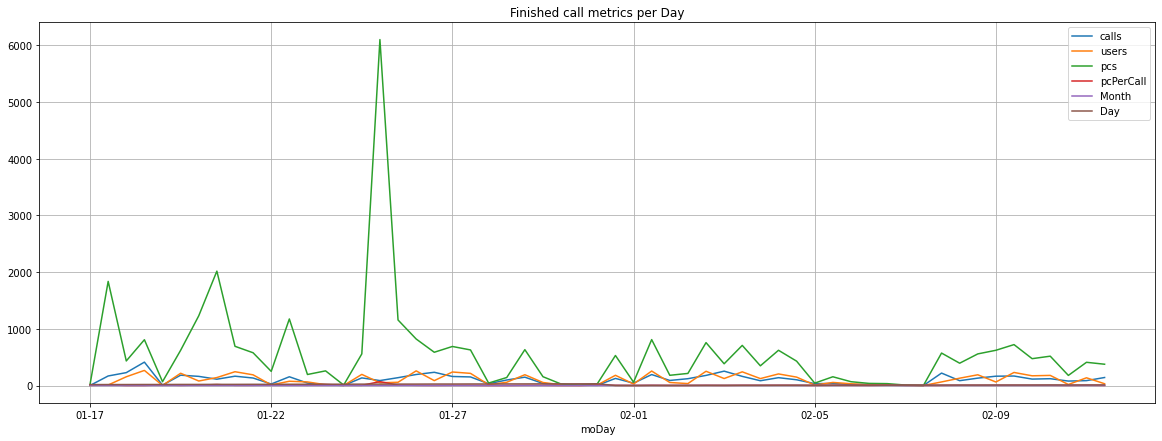

In [ ]:
df.plot.line(x="moDay", figsize=(20, 7), grid=True, title="Finished call metrics per Day")

## Calls per day per server

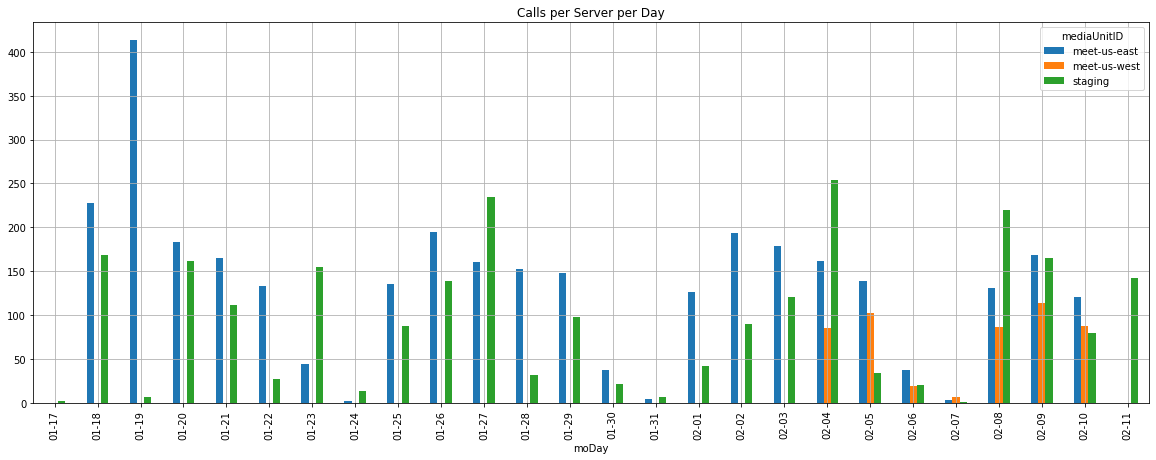

In [ ]:
pivot_table = df.pivot(index="moDay", columns="mediaUnitID", values="calls")
pivot_table.plot.bar(stacked=False, figsize=(20, 7), grid=True, title="Calls per Server per Day")

In [ ]:
# run this to see the table
pivot_table

mediaUnitID,meet-us-east,meet-us-west,staging
moDay,,,
01-17,NaN,NaN,2.0
01-18,228.0,NaN,169.0
01-19,413.0,NaN,7.0
01-20,183.0,NaN,162.0
01-21,165.0,NaN,112.0
01-22,133.0,NaN,27.0
01-23,44.0,NaN,155.0
01-24,2.0,NaN,13.0
01-25,135.0,NaN,88.0


### Unique Users per day

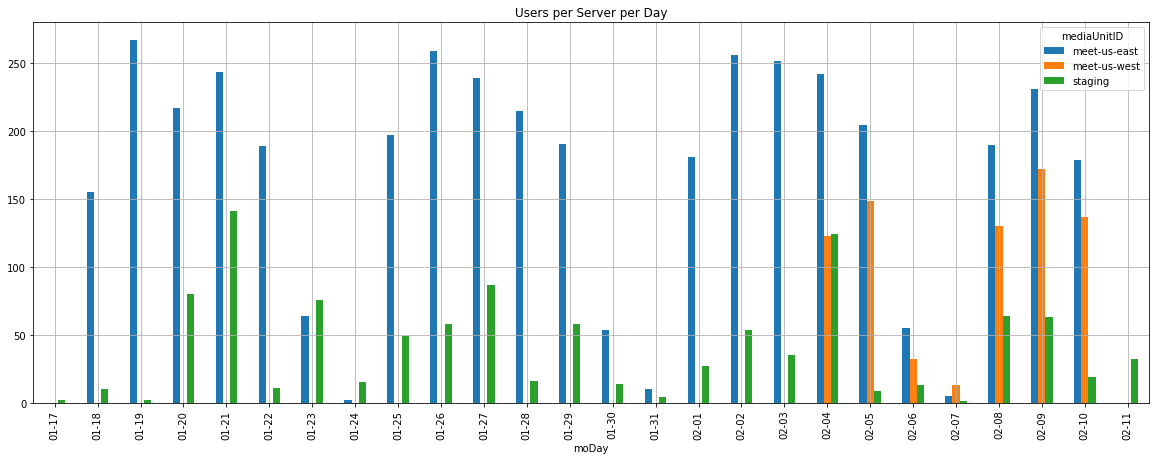

In [ ]:
pivot_table = df.pivot(index="moDay", columns="mediaUnitID", values="users")
pivot_table.plot.bar(stacked=False, figsize=(20, 7), grid=True, title="Users per Server per Day")

## PeerConnections per Call

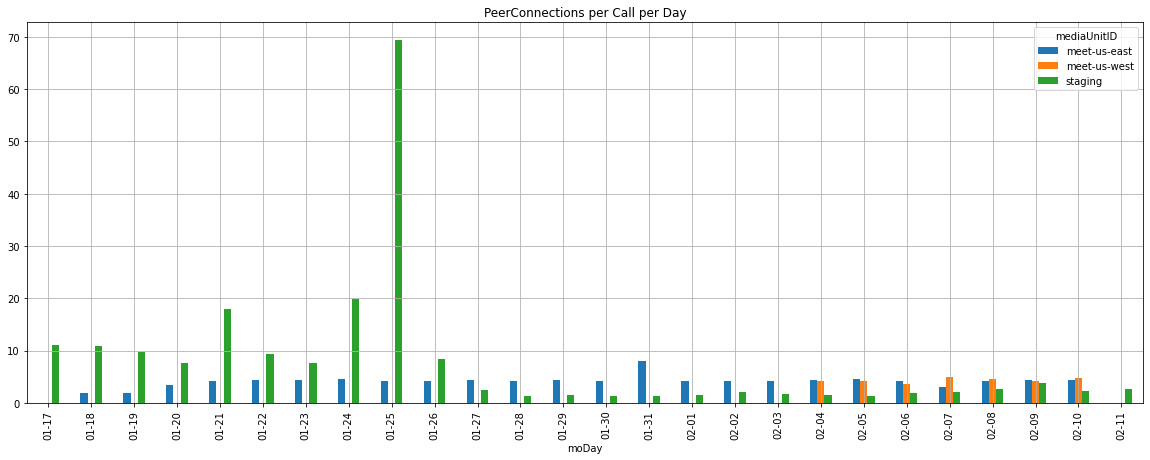

In [ ]:
# use pandas to filter the data some more; use `dff` instead of `df` for filters
#dff = df.query("mediaUnitID == 'staging' or mediaUnitID == 'meet-us-east' or mediaUnitID == 'meet-us-west'")

pivot_table = df.pivot(index="moDay", columns="mediaUnitID", values="pcPerCall")
pivot_table.plot.bar(figsize=(20, 7), grid=True, title="PeerConnections per Call per Day")

## Users Per Call

Build a per-call summary and then find the max & average number of distincit browser IDs per call with more than 1 participant

In [ ]:
%%bigquery df --project $project --verbose --params $params
SELECT
  serviceName,
  MAX(users) AS maxUsersPerCall,
  AVG(users) as avgUsersPerCall,
  Month,
  Day,
  CONCAT( 
    LPAD( CAST(Month as STRING), 2, '0'), 
    "-", 
    LPAD( CAST(Day as STRING), 2, '0') ) AS moDay
 FROM (
  SELECT
      serviceName,
      COUNT(DISTINCT browserID) AS users,
      EXTRACT(MONTH FROM timestamp ) AS Month,
      EXTRACT(DAY FROM timestamp) AS Day
    FROM
      `DetachedPeerConnections`
    WHERE
      # serviceName = @serviceName AND
      timestamp >= TIMESTAMP(@startDate) AND
      timestamp <= TIMESTAMP(@endDate)
    GROUP BY
      serviceName,
      callUUID,
      Month,
      Day
    # Ignore 1-person callIDs
    HAVING users > 1
  )
 GROUP BY serviceName, moDay, Month, Day
 ORDER BY moDay

Executing query with job ID: d5c9ec89-a1d1-42b6-815c-d3d98da71982
Query executing: 0.89s
Query complete after 1.50s


In [ ]:
df

,mediaUnitID,maxUsersPerCall,avgUsersPerCall,Month,Day,moDay
0,staging,2,2.000000,1,17,01-17
1,staging,10,2.705882,1,18,01-18
2,meet-us-east,2,2.000000,1,18,01-18
3,staging,3,2.250000,1,19,01-19
4,meet-us-east,3,2.011204,1,19,01-19
5,staging,96,6.800000,1,20,01-20
6,meet-us-east,4,2.051136,1,20,01-20
7,staging,43,4.941176,1,21,01-21
8,meet-us-east,3,2.044025,1,21,01-21
9,staging,13,4.222222,1,22,01-22


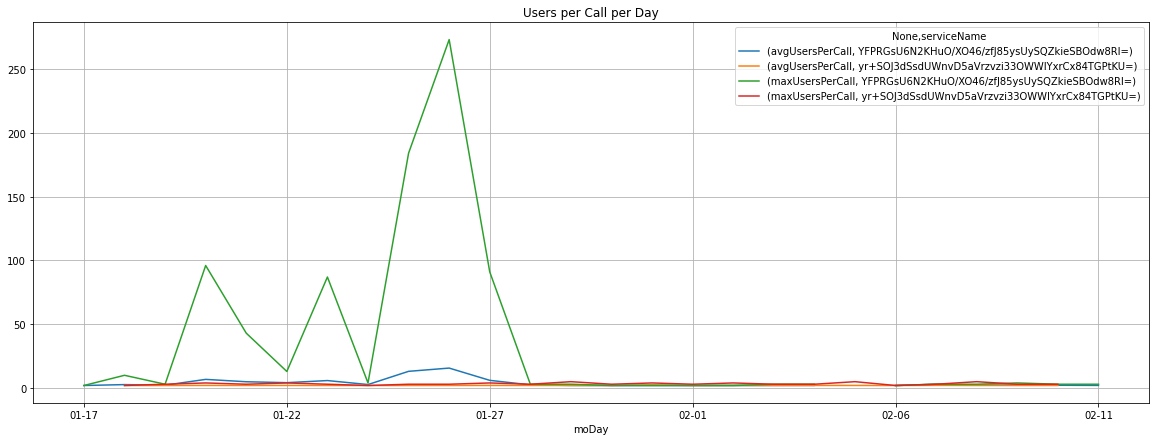

In [ ]:
# use pandas to filter the data some more; use `dff` instead of `df` for filters
# dff = df.query("mediaUnitID == 'meet1' or mediaUnitID == 'meet-us-east' or mediaUnitID == 'meet-us-west'")
pivot_table = df.pivot(index="moDay", columns="serviceName", values=["avgUsersPerCall", "maxUsersPerCall"])
pivot_table.plot(figsize=(20, 7), grid=True, title="Users per Call per Day")

# ToDo: Concurrent reports
These need to be added back to the BigQuery scheme.
See Graphana for this data for now. 

## Peak concurrent Streams per mediaUnit


In [ ]:
%%bigquery df --project $project --verbose --params $params
SELECT 
  EXTRACT(MONTH FROM timestamp) AS Month,
  EXTRACT(DAY FROM timestamp) AS Day,
  CONCAT(
      LPAD( CAST(EXTRACT(MONTH FROM timestamp ) AS STRING), 2, '0'), 
      "-", 
      LPAD( CAST(EXTRACT(DAY FROM timestamp ) AS STRING), 2, '0')
    ) AS moDay, 
  mediaUnitID,
  MAX(peerConnectionsNum) as maxPCs
FROM `ConcurrentStreams`
WHERE 
  timestamp >= TIMESTAMP(@startDate) AND
  timestamp <= TIMESTAMP(@endDate) 
GROUP BY moDay, Month, Day, mediaUnitID 
ORDER by moDay ASC

In [ ]:
df

,Month,Day,moDay,mediaUnitID,maxPCs
0,12,5,12-05,meet-us-east,4
1,12,5,12-05,meet-us-west,3
2,12,6,12-06,meet-us-east,3
3,12,6,12-06,meet-us-west,3
4,12,7,12-07,meet1,1
5,12,7,12-07,meet-us-east,10
6,12,7,12-07,meet-us-west,6
7,12,8,12-08,meet-us-east,30
8,12,8,12-08,meet-us-west,19
9,12,9,12-09,meet-us-west,29


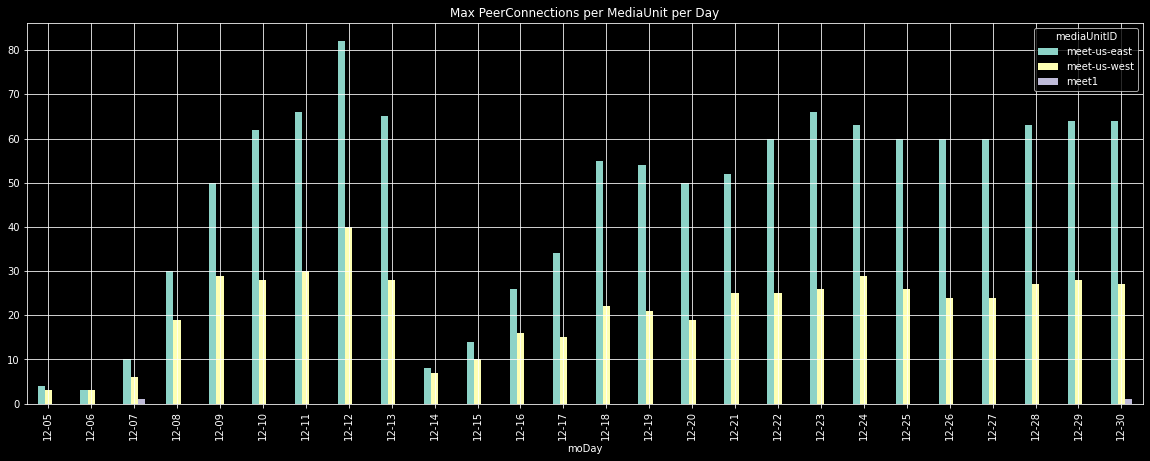

In [ ]:
# use pandas to filter the data some more
dff = df.query("mediaUnitID == 'meet1' or mediaUnitID == 'meet-us-east' or mediaUnitID == 'meet-us-west'")

pivot_table = dff.pivot(index="moDay", columns="mediaUnitID", values="maxPCs")
pivot_table.plot.bar(figsize=(20, 7), grid=True, title="Peak PeerConnections per MediaUnit per Day")

# Quality Metrics

## Average RTT per Server
A quick analysis of RTT values.

In [ ]:
%%bigquery df --project $project --verbose --params $params
SELECT 
  EXTRACT(MONTH FROM timestamp) AS Month,
  EXTRACT(DAY FROM timestamp) AS Day,
  CONCAT(
      LPAD( CAST(EXTRACT(MONTH FROM timestamp ) AS STRING), 2, '0'), 
      "-", 
      LPAD( CAST(EXTRACT(DAY FROM timestamp) AS STRING), 2, '0')
    ) AS moDay, 
    r.mediaUnitID,
   AVG(roundTripTime) as avgRTT 
FROM `RemoteInboundRTPSamples` r
# Do something like the below to only check peerConnections used in actual calls
#  INNER JOIN `MyNewWebRTC.JoinedPeerConnections` p ON p.peerConnectionUUID = r.peerConnectionUUID
#  INNER JOIN `MyNewWebRTC.FinishedCalls` f ON f.callUUID = p.callUUID 
WHERE 
  timestamp >= TIMESTAMP(@startDate) AND
  timestamp <= TIMESTAMP(@endDate) AND 
  roundTripTime > 0 and roundTripTime < 2 # should I cap this? 
GROUP BY moDay, mediaUnitID, Month, Day
ORDER by moDay ASC

Executing query with job ID: b741a992-47df-4730-8e14-69e4a11dce88
Query executing: 0.38s
Query complete after 0.90s


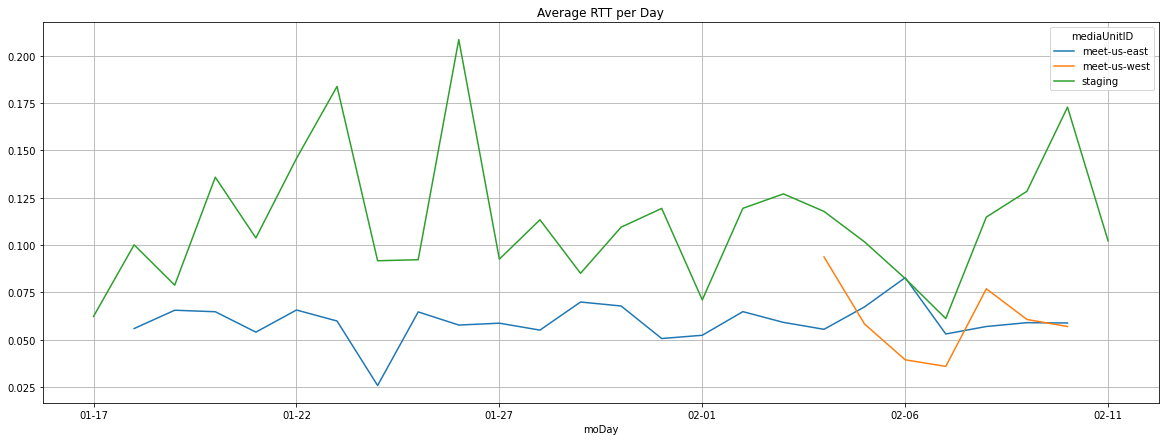

In [ ]:
# extra filter
# dff = df.query("mediaUnitID == 'meet1' or mediaUnitID == 'meet-us-east' or mediaUnitID == 'meet-us-west'")

pivot = df.pivot(index="moDay", columns='mediaUnitID', values='avgRTT')
pivot.plot(figsize=(20, 7), grid=True, title="Average RTT per Day")

## Top quality limiting reasons

***WARNING: this is usually an expensive report***

In [ ]:
%%bigquery df --project $project --verbose --params $params
SELECT
  # serviceName,
  mediaUnitId,
  qualityLimitationReason,
  SUM(qty) as qty,
  Month,
  Day,
  CONCAT( 
    LPAD( CAST(Month as STRING), 2, '0'), 
    "-", 
    LPAD( CAST(Day as STRING), 2, '0') ) AS moDay
 FROM (
  SELECT
      # serviceName,
      mediaUnitId,
      qualityLimitationReason,
      COUNT(*) as qty,
      EXTRACT(MONTH FROM timestamp ) AS Month,
      EXTRACT(DAY FROM timestamp) AS Day
    FROM
      `OutboundRTPSamples`
    WHERE
      # serviceName = @serviceName AND
      timestamp >= TIMESTAMP(@startDate) AND
      timestamp <= TIMESTAMP(@endDate)
    GROUP BY
      # serviceName,
      mediaUnitId,
      qualityLimitationReason,
      Month,
      Day
  ) t
 GROUP BY 
  # serviceName, 
  mediaUnitId, qualityLimitationReason, moDay, Month, Day
 ORDER BY moDay

Executing query with job ID: 5a3ee449-2c44-4e34-8bec-deda925592de
Query executing: 5.45s
Query complete after 6.25s


In [ ]:
df

,mediaUnitId,qualityLimitationReason,qty,Month,Day,moDay
0,staging,NULL,311,1,17,01-17
1,staging,NONE,111,1,17,01-17
2,staging,BANDWIDTH,44,1,17,01-17
3,meet-us-east,BANDWIDTH,5690,1,18,01-18
4,staging,NULL,19118,1,18,01-18
...,...,...,...,...,...,...
217,staging,BANDWIDTH,11148,2,10,02-10
218,staging,NULL,45102,2,11,02-11
219,staging,CPU,7046,2,11,02-11
220,staging,NONE,27263,2,11,02-11


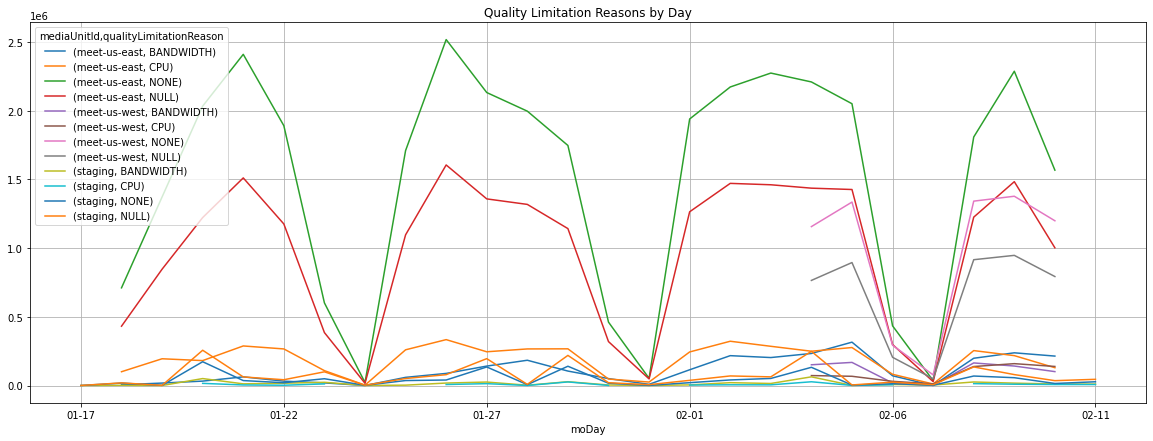

In [ ]:
# ToDo: redo as a $ of group per day, remove NULL & NONE
#dff = df.query("qualityLimitationReason != 'NULL' and qualityLimitationReason != 'NONE'")

pivot = df.pivot_table(index="moDay", columns=["mediaUnitId", "qualityLimitationReason"], values="qty", aggfunc="mean")
pivot.plot(figsize=(20, 7), grid=True, title="Quality Limitation Reasons by Day")
